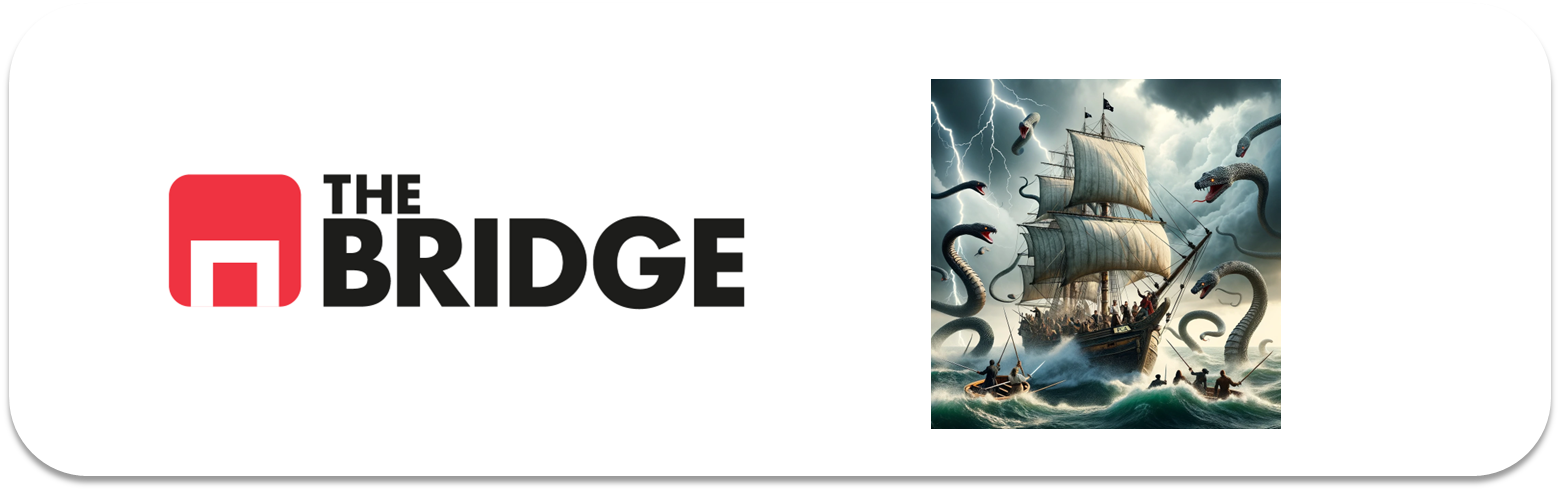

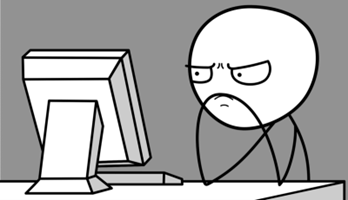

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [7]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [4]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_14/Unidad_01/Ejercicios_Workout/data/nutrition.csv")

df.head()


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [6]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

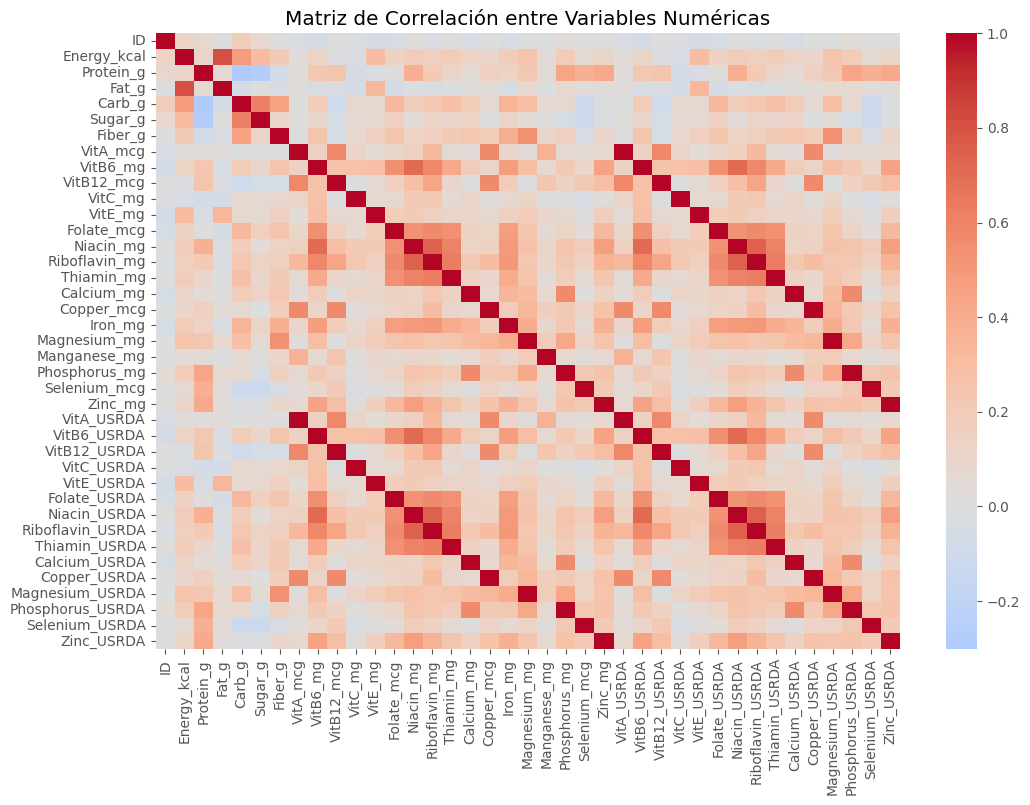

In [8]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [9]:
# #USRDA = United Stated Recommended Daily/Dietary Allowance

# La matriz de correlación muestra que las columnas USRDA están altamente correlacionadas (cercanas a 1) 
# con sus versiones absolutas, lo que indica que contienen información redundante.

# Decisión: Se eliminarán las columnas *_USRDA para evitar duplicidad en el análisis de PCA.

usrda_mapping = {
    "VitA_USRDA": "VitA_mcg",
    "VitB6_USRDA": "VitB6_mg",
    "VitB12_USRDA": "VitB12_mcg",
    "VitC_USRDA": "VitC_mg",
    "VitE_USRDA": "VitE_mg",
    "Folate_USRDA": "Folate_mcg",
    "Niacin_USRDA": "Niacin_mg",
    "Riboflavin_USRDA": "Riboflavin_mg",
    "Thiamin_USRDA": "Thiamin_mg",
    "Calcium_USRDA": "Calcium_mg",
    "Copper_USRDA": "Copper_mcg",
    "Magnesium_USRDA": "Magnesium_mg",
    "Phosphorus_USRDA": "Phosphorus_mg",
    "Selenium_USRDA": "Selenium_mcg",
    "Zinc_USRDA": "Zinc_mg",
}

# Filtrar solo las columnas de interés
usrda_cols = list(usrda_mapping.keys())

# Eliminar las columnas USRDA
df_clean = df.drop(columns=usrda_cols)

# Verificar que las columnas han sido eliminadas
df_clean.head()


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [10]:
categorical_cols = ["FoodGroup", "ShortDescrip", "Descrip", "CommonName", "MfgName", "ScientificName"]
df_numeric = df_clean.drop(columns=categorical_cols)

df_numeric.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


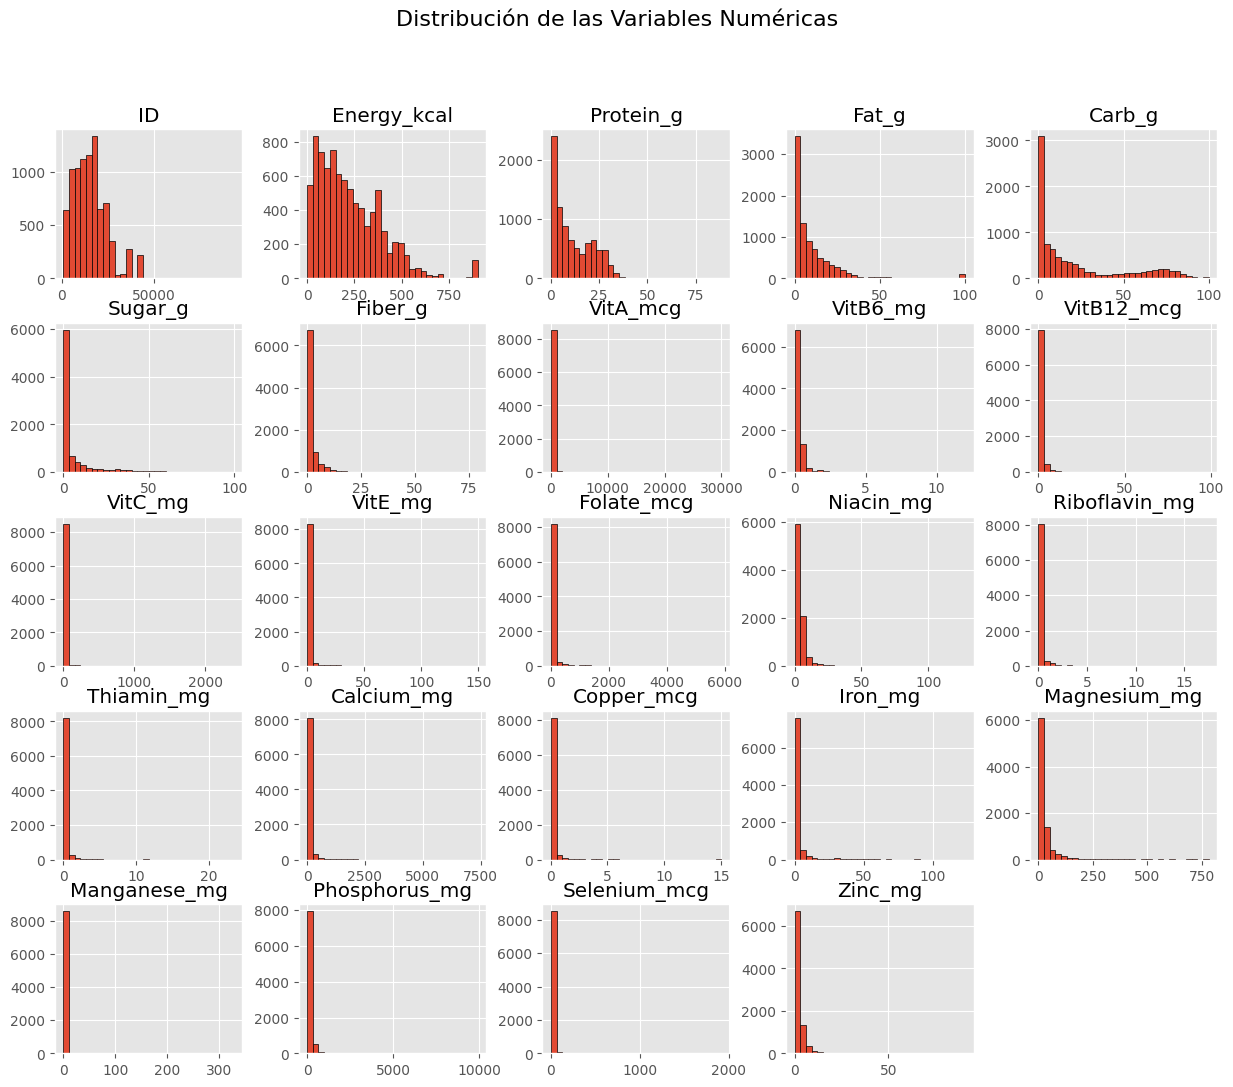

In [11]:
df_numeric.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Distribución de las Variables Numéricas", fontsize=16)
plt.show()

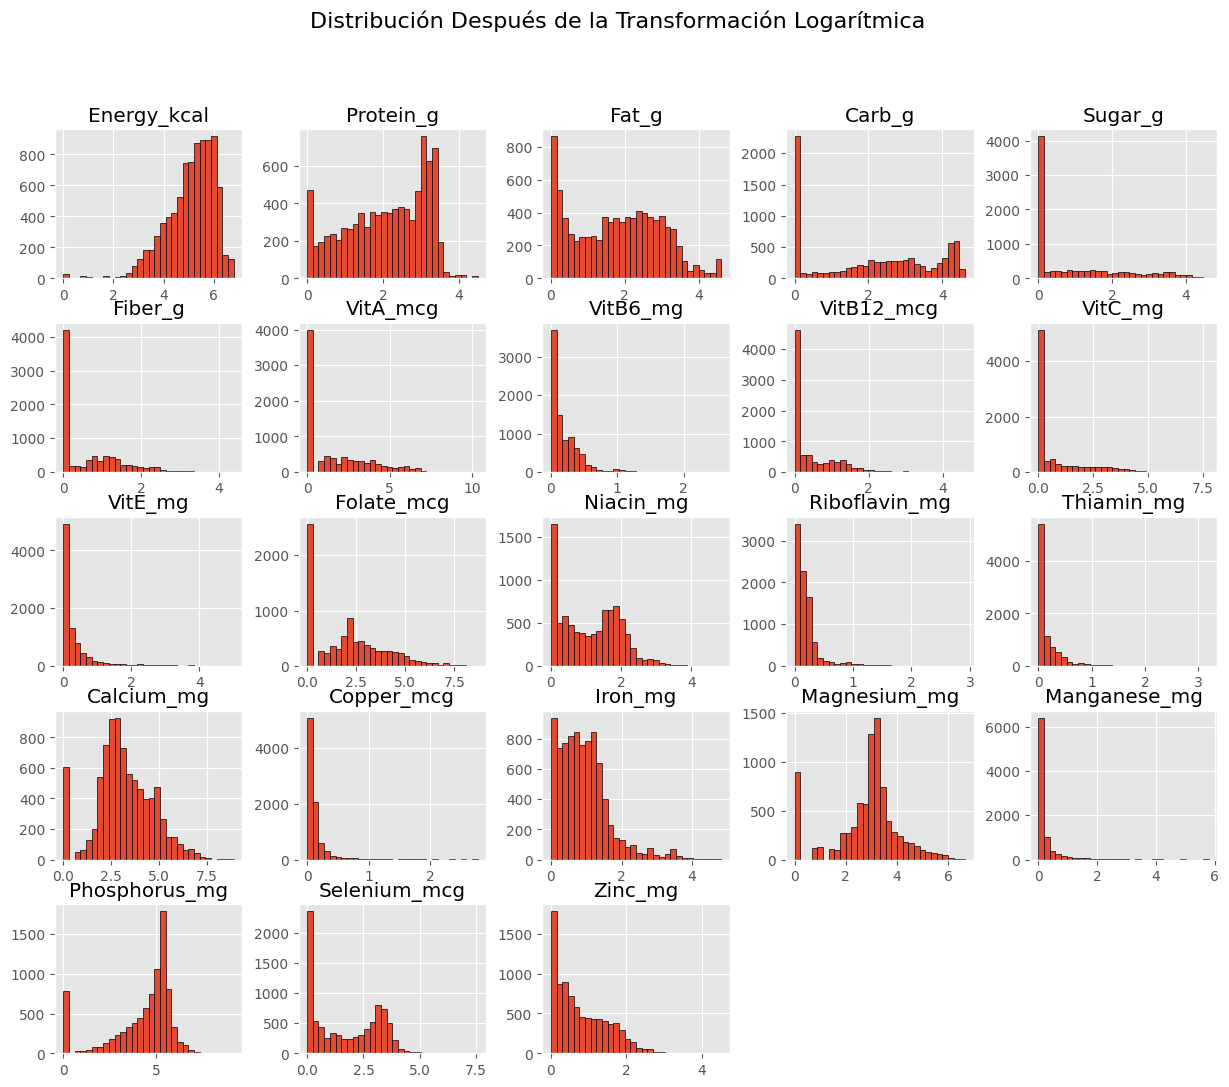

In [12]:
# Identificar sesgo en las variables
skewness = df_numeric.drop(columns=['ID']).skew()

# Seleccionar variables con alto sesgo (mayor a 1 (asimetria a la derecha) o menor a -1 (asimetria a la izquierda))
highly_skewed = skewness[abs(skewness) > 1].index

# Aplicar transformación logarítmica (suma 1 para evitar log(0))
df_numeric[highly_skewed] = np.log1p(df_numeric[highly_skewed])

# Visualizar distribuciones después de la transformación
df_numeric[highly_skewed].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Distribución Después de la Transformación Logarítmica", fontsize=16)
plt.show()

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [13]:
# Excluir la columna 'ID' antes de la estandarización
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric.drop(columns=['ID']))

# Convertir de nuevo a DataFrame para mejor interpretación
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns[1:])

# Mostrar las primeras filas del dataset estandarizado
df_scaled.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398


In [14]:
df_scaled.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,...,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03
mean,-2.160155e-16,1.945789e-16,9.069355e-17,2.473460e-16,-1.220240e-16,-2.473460e-17,1.022364e-16,5.853856e-17,-5.111818e-17,4.122434e-17,...,1.047098e-16,-8.162419e-17,5.936305e-17,-1.710810e-16,-5.606510e-17,5.194267e-17,4.946921e-18,-4.452229e-17,-1.401628e-16,4.452229e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-5.207330e+00,-1.961806e+00,-1.510128e+00,-1.315522e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-8.238454e-01,-6.936126e-01,-6.350195e-01,...,-8.399996e-01,-7.050583e-01,-2.092453e+00,-6.242369e-01,-1.318770e+00,-2.173767e+00,-4.782942e-01,-2.480348e+00,-1.184060e+00,-1.150447e+00
25%,-5.457117e-01,-7.845487e-01,-9.263689e-01,-1.291167e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-6.835452e-01,-6.936126e-01,-6.350195e-01,...,-6.323408e-01,-5.719706e-01,-5.645306e-01,-4.784691e-01,-7.217313e-01,-3.181753e-01,-4.782942e-01,-3.635339e-01,-1.117607e+00,-8.527826e-01
50%,1.870891e-01,1.467749e-01,3.962894e-02,1.108632e-01,-5.506944e-01,-4.976256e-01,-3.927255e-01,-3.517040e-01,-5.760347e-01,-6.350195e-01,...,-1.946664e-01,-3.689783e-01,-1.045803e-01,-2.492755e-01,-1.312444e-01,1.822119e-01,-4.214700e-01,3.698432e-01,-7.599149e-02,-2.697727e-01
75%,7.643284e-01,9.180010e-01,7.773286e-01,8.723726e-01,6.428538e-01,6.756910e-01,6.811104e-01,4.418293e-01,5.772068e-01,3.544323e-01,...,2.271297e-01,2.013203e-01,6.567993e-01,4.242737e-02,4.717289e-01,4.582220e-01,4.522832e-02,6.503660e-01,9.805632e-01,7.307952e-01
max,1.775637e+00,2.288877e+00,2.397860e+00,1.550276e+00,2.811782e+00,4.530055e+00,4.212004e+00,9.862054e+00,6.340292e+00,5.512622e+00,...,1.263244e+01,1.367385e+01,3.816285e+00,1.306404e+01,5.455266e+00,2.981455e+00,1.465655e+01,2.874676e+00,4.086359e+00,5.350618e+00


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [ ]:
# Aplicar PCA con el número máximo de componentes
pca = PCA(n_components=df_scaled.shape[1])
pca_transformed = pca.fit_transform(df_scaled)  #(esto es un array de NumPy)

# Convertir a DataFrame
df_pca = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(df_scaled.shape[1])])

# Mostrar las primeras filas del resultado
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222,0.151252,-1.772161,0.602479,0.349131,...,-0.257870,-0.742955,-0.051307,0.326763,-0.013080,0.149184,-0.200207,-0.189650,-0.113184,-0.990668
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613,0.212474,-1.803114,0.631115,0.370739,...,-0.196270,-0.672875,-0.123157,0.252877,-0.041879,0.146487,-0.231841,-0.270989,-0.105031,-0.996979
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607,0.441633,-2.072117,0.669849,0.416010,...,-0.287451,-0.453165,-0.298863,0.360334,-0.024622,0.340382,-0.101061,0.043759,-0.029551,-0.969739
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054,0.487040,-0.605196,0.346731,0.031138,...,-0.568411,-0.834855,0.170395,0.206497,0.571226,0.286625,0.432108,0.166991,-0.043590,-0.023191
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876,0.797944,-0.527531,0.575260,-0.003342,...,-0.300580,-0.757149,0.314135,0.500514,0.356466,0.498769,0.655265,-0.078099,0.007189,0.048070


### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [16]:
# Crear un DataFrame con los coeficientes de cada componente
pca_components = pd.DataFrame(pca.components_, columns=df_scaled.columns, index=[f'PC{i+1}' for i in range(df_scaled.shape[1])])

pca_components


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,0.522265,0.079023,0.473911,0.210881,0.184202,0.136179,-0.292311,-0.159116,-0.185990,-0.394600,...,-0.096958,0.057955,-0.093723,-0.040051,0.039002,-0.073287,0.029160,-0.016400,-0.062524,-0.039190
PC4,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC5,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC6,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC7,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC8,-0.006633,0.043613,-0.090748,-0.000223,0.484500,0.066867,-0.381964,0.084649,0.247129,0.302244,...,-0.196122,-0.395320,0.056744,0.055444,-0.003136,0.191494,-0.196760,0.103840,-0.009711,0.317642
PC9,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC10,0.295080,0.017928,0.318727,0.035122,-0.210174,-0.101103,-0.080107,-0.183531,-0.065568,0.639078,...,-0.088774,-0.001610,-0.233598,0.020123,0.103469,0.016090,-0.165279,0.021910,-0.085098,-0.002007


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

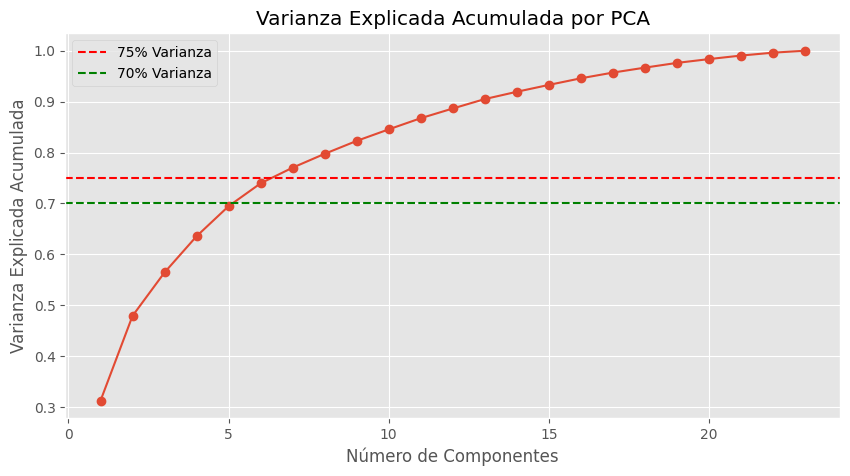

6

In [17]:
# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar la varianza acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.75, color='r', linestyle='--', label="75% Varianza")
plt.axhline(y=0.70, color='g', linestyle='--', label="70% Varianza")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada Acumulada por PCA")
plt.legend()
plt.grid(True)
plt.show()

# Determinar el número de componentes necesarios para 70-75% de varianza
n_components_opt = (cumulative_variance >= 0.70).argmax() + 1
n_components_opt

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [18]:
# Aplicar PCA con el número óptimo de componentes
pca_reduced = PCA(n_components=n_components_opt)
pca_transformed_reduced = pca_reduced.fit_transform(df_scaled)

# Convertir a DataFrame
df_pca_reduced = pd.DataFrame(pca_transformed_reduced, columns=[f'PC{i+1}' for i in range(n_components_opt)])

df_pca_reduced


,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876
...,...,...,...,...,...,...
8613,2.553661,-2.548700,-0.472185,-0.109428,2.716513,0.018570
8614,0.075018,-1.840922,-0.935725,-1.348908,-0.392092,-0.759672
8615,-2.930529,1.664405,1.242070,1.172396,-0.915550,-0.885902
8616,1.118895,-0.780834,-0.805126,-1.581838,1.641702,1.090002
